# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing two different dictionary initalization strategies

1- Dictionary initialized as 2D White Noise

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [18]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico', 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'DICT_INIT'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method='HEH',
              learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : data_cache/data_data
Data is of shape : (81920, 576) - done in 1.01s.


In [13]:
%ls -l data_cache/

total 737288
-rw-r--r--  1 angelofranciosini  staff  377487440 Jan 17 13:19 data_data.npy


In [14]:
!rm -fr data_cache/{tag}*lock*
!rm -fr data_cache/{tag}*

In [15]:
%ls -l data_cache/

total 737288
-rw-r--r--  1 angelofranciosini  staff  377487440 Jan 17 13:19 data_data.npy


## White Noise Initialization + Learning

loading the dico called : data_cache/DICT_INIT_WHITE_dico.pkl
loading the code called : data_cache/DICT_INIT_WHITE_coding.npy
loading the code called : data_cache/DICT_INIT_WHITE_coding.npy


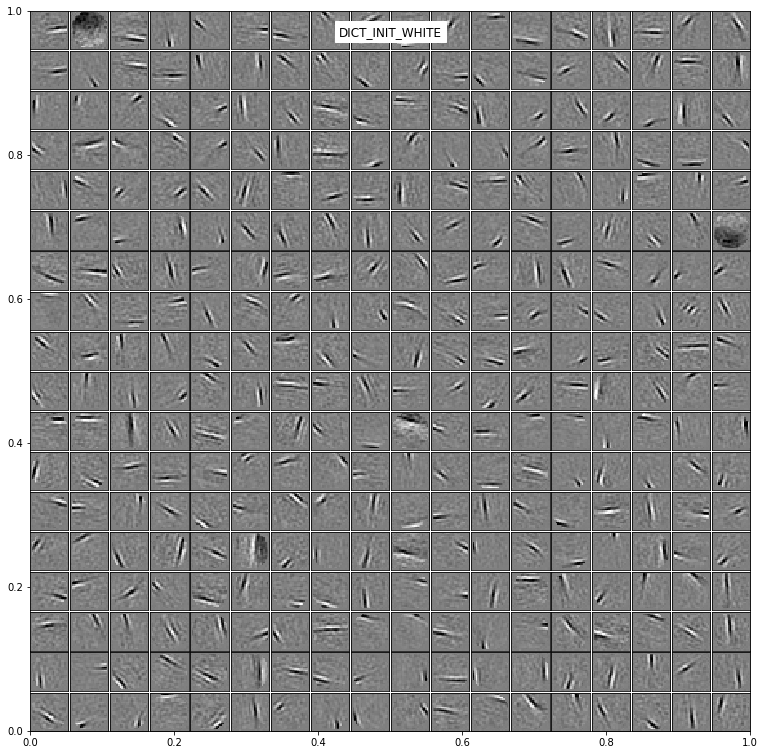

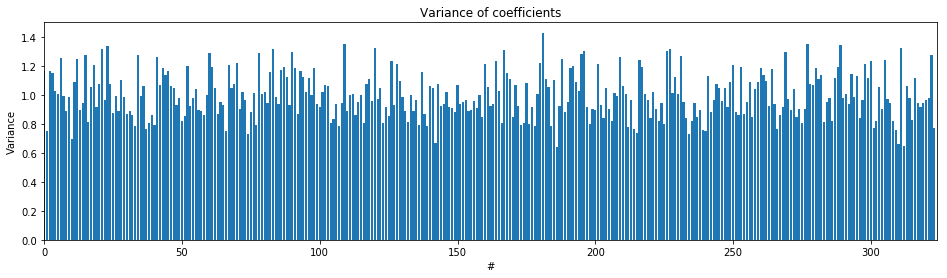

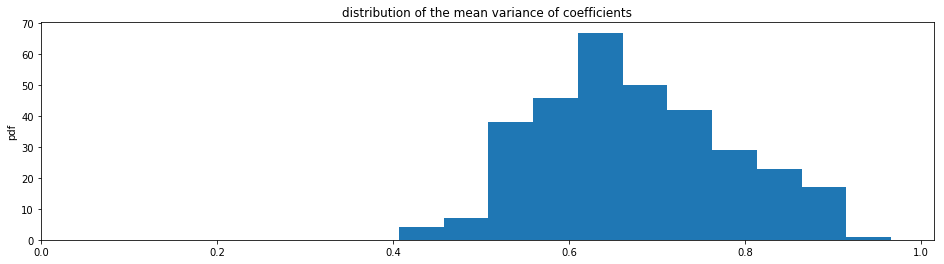

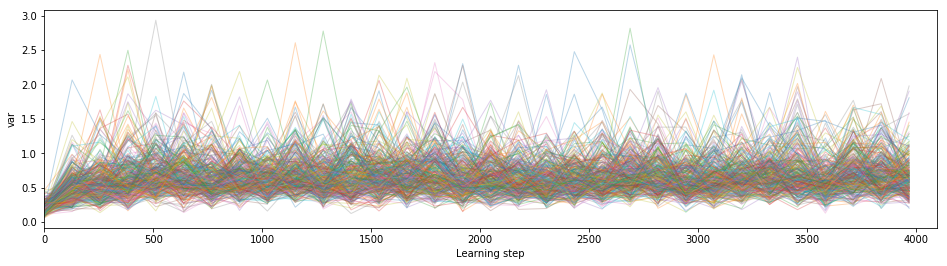

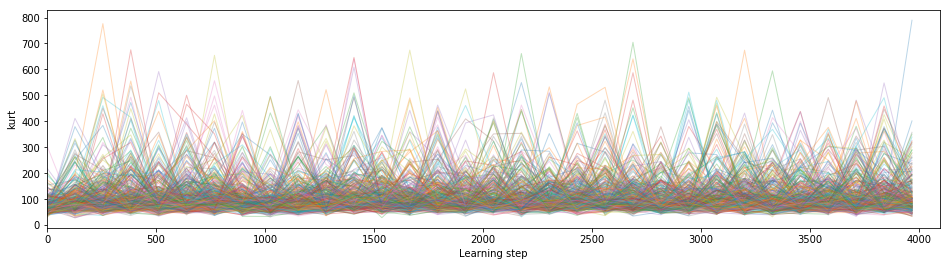

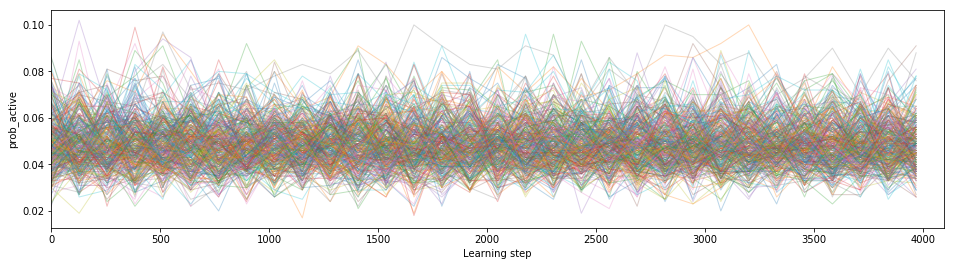

In [19]:
matname = tag + '_WHITE'
shl = SHL(one_over_F=False, **opts)
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
plt.show()

## 1/f Noise Initialization + Learning

No cache found data_cache/DICT_INIT_OVF_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   4096 (elapsed time:   0s,  0.0mn)
Iteration  410 /   4096 (elapsed time:  233s,  3.0mn)
Iteration  820 /   4096 (elapsed time:  458s,  7.0mn)
Iteration  1230 /   4096 (elapsed time:  683s,  11.0mn)
Iteration  1640 /   4096 (elapsed time:  897s,  14.0mn)
Iteration  2050 /   4096 (elapsed time:  1100s,  18.0mn)
Iteration  2460 /   4096 (elapsed time:  1286s,  21.0mn)
Iteration  2870 /   4096 (elapsed time:  1473s,  24.0mn)
Iteration  3280 /   4096 (elapsed time:  1660s,  27.0mn)
Iteration  3690 /   4096 (elapsed time:  1859s,  30.0mn)
Learning code... done (total time:  2061s,  34.4mn)
done in 2061.16s.
No cache found data_cache/DICT_INIT_OVF_coding.npy: Coding with algo = mp 
 Coding data with algorithm  mp done in 13.49s.
loading the code called : data_cache/DICT_INIT_OVF_coding.npy


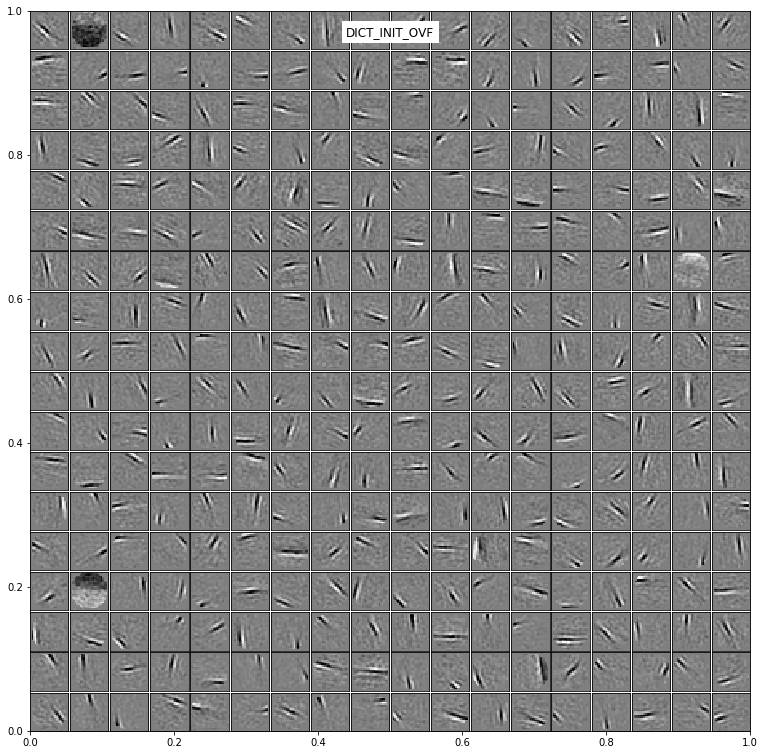

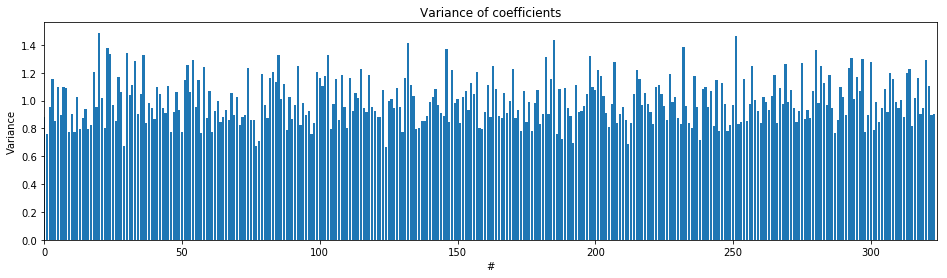

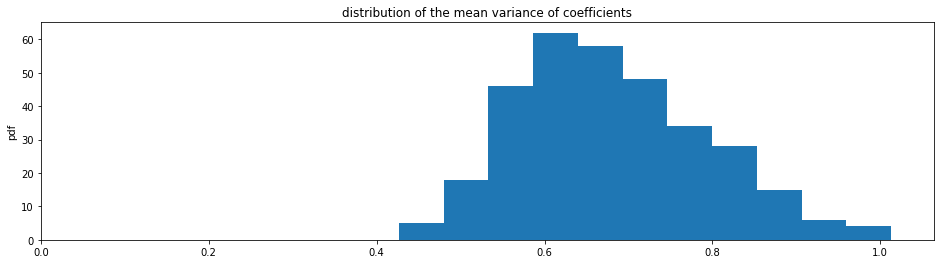

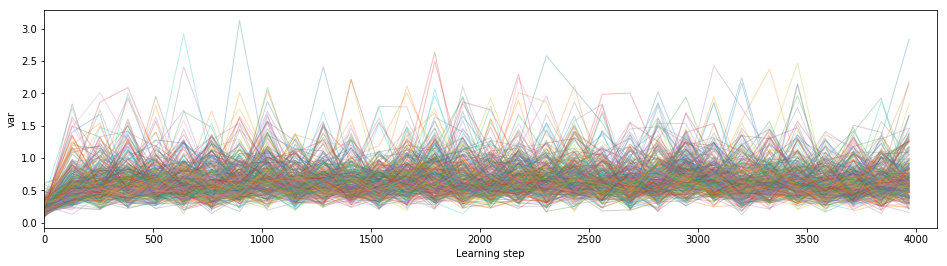

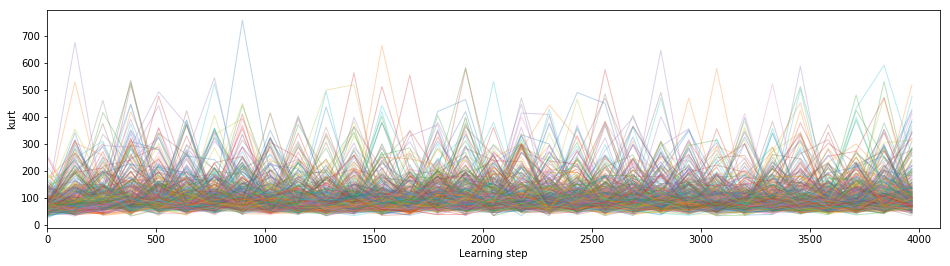

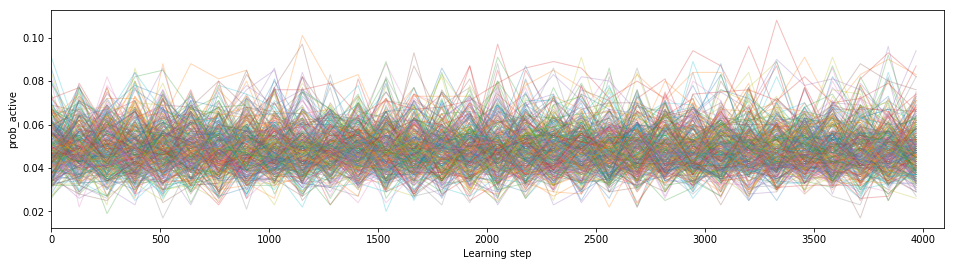

In [20]:
matname = tag + '_OVF'
shl = SHL(one_over_F=True, **opts)
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
plt.show()